In [6]:
import pandas as pd
import numpy as np
data=pd.read_csv('data.csv')
data=data.drop(['Unnamed: 0', 'company', 'url', 'location', 'headquaters',
       'employees', 'founded', 'industry'],axis=1)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score
from sklearn.metrics.pairwise import euclidean_distances
pd.set_option('display.max_colwidth', 1500)
from subprocess import check_output
data.head()

,position,Job Description
0,Graduate Intern (Summer 2017) - SAP BI / Big Data / Analytics / Visualization,"Location: Plano, TX or Oklahoma City, OK Duration: Internship During Summer 2017 Term Job Summary: Visual BI Solutions Inc is seeking Graduate Interns with strong expertise/passion in BI or Big Data & Analytics Solutions (SAP BW or SAP HANA or Oracle / MS SQL EDW / PL/SQL / BODS / SAS / Big Data / Visualization Tools) to join our College Recruiting Hiring Program. In this role, you would be building best-in-class BI, Analytics & Big Data Solutions that would be consumed by leaders and executives of Fortune 500 organizations. A strong sense of business analysis, ETL, Data Modeling, Data Warehousing, Visualization, Reporting, Advanced Analytics and data interpretation are some of the key attributes we look for. As a market leader in SAP BI & Analytics - Visual BI is very selective in student hiring and so candidates with portfolio of non-academic project work/technical blogs will be preferred over work experience or academic GPA Scores. You will be asked to hone your BI & Analytics expertise during your internship and you will be working with some of the best customers and BI talent in the world Requirements-2+ years of IT BI / EDW / ETL / Big Data development or Relevant Work BI/DataWarehousing experience is Preferred -Visual BI will consider your non-academic projects to showcase your experience in these areas -Experience with SAP HANA or SAP BW or SAP BODS or Big Data Frameworks (Hadoop/Spark, ..) a PLUS- Candidates with Reporting or Web Development Skills (CSS/JavaSc..."
1,Digital Marketing Manager,"The Digital Marketing Manager is the front line of patient, consumer and audience engagement for EyeCare Services Partners and its affiliates, leading and defining the digital marketing mix, with an emphasis on social media, web, email and content marketing. The Digital Marketing Manager will work closely with cross functional teams to plan and execute high impact marketing strategies designed to drive results.Essential Functions Own and execute digital brand presence through social media, web, and email strategies, implementing best practices and utilizing data and insights for continued evolution Understand digital platforms and upcoming trends with ability to foster into tangible action for brand Leverage brand and consumer/patient insight to engage and foster stronger consumer engagement across digital platforms Lead project based marketing initiatives such as influencer and engagement campaigns Manage day-to-day communications with internal teams, brands, partners, and patients/consumers Oversee practice website redesign Introduce Patient Communication Software (solution reach) Introduce and assist with internet and marketing packages (Glacial) Manage content for corporate web site Manage digital (organic and paid) channels, and track, and analyze all digital marketing efforts Create Marketing Collateral as needed for both corporate and practices (i.e. trade show banners, email blasts, flyers, posters, ads, concepts for radio, seasonal campaigns for specialty servic..."
2,"Manager, Pricing Management Information Systems","Summary of Responsibilities:The Manager Pricing MIS will be responsible for assisting the Pricing & Strategy and Profitability Teams within Decision Sciences in the execution of information gathering and reporting. Manager Pricing MIS is responsible for managing development and production of pricing reporting and supervising analysts responsible for converting existing daily, weekly, monthly and ad-hoc reports to more efficient delivery tools which includes data visualization. Supervision of a portion of the Pricing MIS team will require leadership and direction for timely internal and regulatory, ongoing and ad-hoc reporting support to Pricing & Strategy and Profitability segments within Decision Sciences. Consistency and quality of information reports along with repository management will be critical

In [7]:
# unigram vector representation
vectorizer = TfidfVectorizer(stop_words='english',
                     binary=False,
                     max_df=0.95, 
                     min_df=0.15,
                     ngram_range = (1,2),use_idf = False, norm = None)
doc_vectors = vectorizer.fit_transform(data['Job Description'])
print(doc_vectors.shape)
print(vectorizer.get_feature_names())

(157, 457)
['000', '000 employees', '10', '100', '12', '2017', 'ability', 'ability work', 'able', 'academic', 'access', 'accounting', 'action', 'actively', 'activities', 'additional', 'advanced', 'affirmative', 'affirmative action', 'age', 'analysis', 'analytical', 'analytical skills', 'analytics', 'analyze', 'applicable', 'applicants', 'applicants receive', 'application', 'applications', 'apply', 'area', 'areas', 'assigned', 'assist', 'attention', 'bachelor', 'bachelor master', 'background', 'based', 'basis', 'believe', 'benefits', 'best', 'big', 'big data', 'billion', 'broad', 'build', 'building', 'business', 'candidate', 'candidates', 'capabilities', 'capital', 'career', 'challenges', 'citizenship', 'client', 'clients', 'closely', 'cloud', 'collaborate', 'collaborative', 'college', 'color', 'color religion', 'com', 'committed', 'communication', 'communication skills', 'company', 'complex', 'computer', 'computer science', 'conditions', 'consideration', 'consideration employment', 'co

In [8]:
def comp_description(query, results_number=20):
        results=[]
        q_vector = vectorizer.transform([query])
        print("Comparable Description: ", query)
        results.append(cosine_similarity(q_vector, doc_vectors.toarray()))
        f=0
        elem_list=[]
        for i in results[:10]:
            for elem in i[0]:
                    #print("Review",f, "Similarity: ", elem)
                    elem_list.append(elem)
                    f+=1
            print("The Review Most similar to the Comparable Description is Description #" ,elem_list.index(max(elem_list)))
            print("Similarity: ", max(elem_list))
            if sum(elem_list) / len(elem_list)==0.0:
                print("No similar descriptions")
            else:
                print(data['Job Description'].loc[elem_list.index(max(elem_list)):elem_list.index(max(elem_list))])

In [13]:
data_science="Machine learning, python, data, analysis"
comp_description(data_science)

Comparable Description:  Machine learning, python, data, analysis
The Review Most similar to the Comparable Description is Description # 52
Similarity:  0.2996672211954121
52       Aviall is the world's largest provider of new aviation parts and related aftermarket services. Aviall markets and distributes products for more than 240 manufacturers and offers approximately 2,000,000 catalog items from 40 customer service centers located in North America, Europe, and Asia-Pacific. Aviall prides itself in having an open‚ performance–based culture throughout the organization. We offer an environment that is diverse, challenging and supportive, and provides hands-on experience and real-world responsibilities that serves as the springboard for a successful career. We are also very proud to consistently receive outstanding awards for our diversity and recruitment efforts including the “Top 100 Military-Friendly Employers.” Come join our talented world class team and thrive in a dynamic and supp

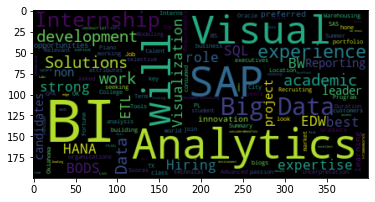

In [14]:
#Graduate Intern (Summer 2017) - SAP BI / Big Data / Analytics / Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(data.iloc[0]['Job Description'])
plt.imshow(wordcloud, interpolation="bilinear")

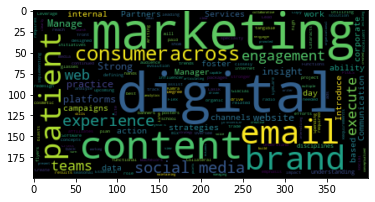

In [15]:
#Digital Marketing Manager
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(data.iloc[1]['Job Description'])
plt.imshow(wordcloud, interpolation="bilinear")

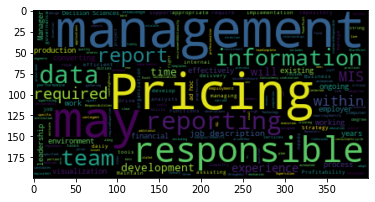

In [16]:
#Manager, Pricing Management Information Systems
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(data.iloc[2]['Job Description'])
plt.imshow(wordcloud, interpolation="bilinear")

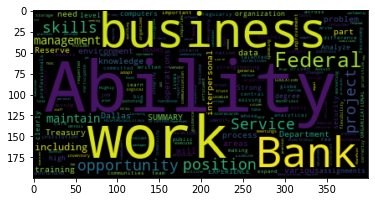

In [17]:
#Treasury Services Analyst Internship
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(data.iloc[3]['Job Description'])
plt.imshow(wordcloud, interpolation="bilinear")

In [20]:
data['Job Description'].apply(lambda x: len(x.split(' '))).sum()

85389

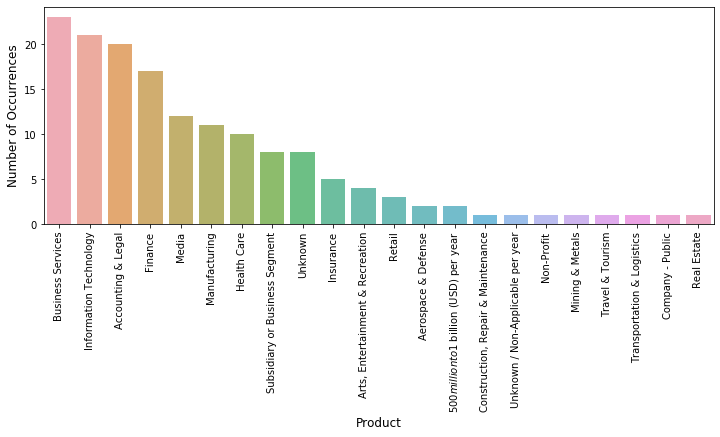

In [24]:
import seaborn as sns
cnt_pro = df['industry'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [25]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

Loading BokehJS ...

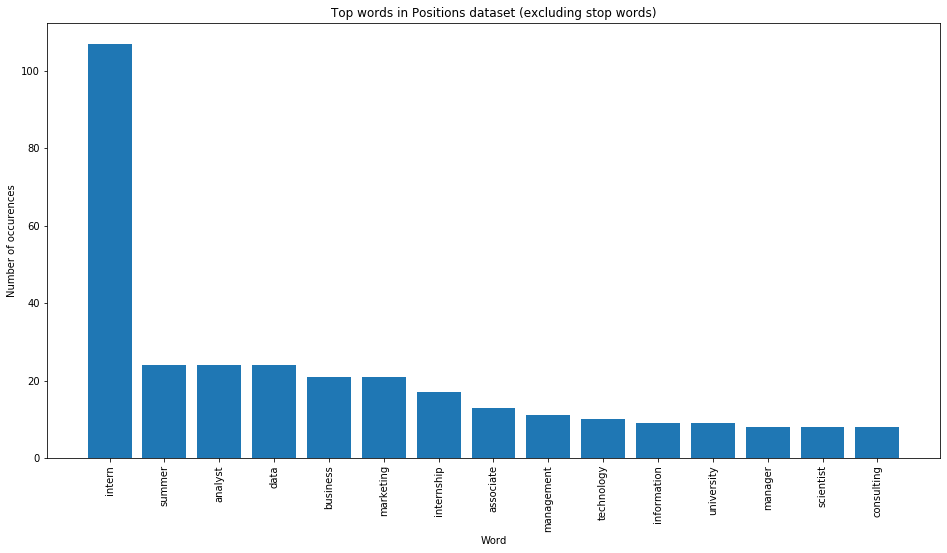

In [27]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])







tex = data['position']
type(tex)
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=tex)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in Positions dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

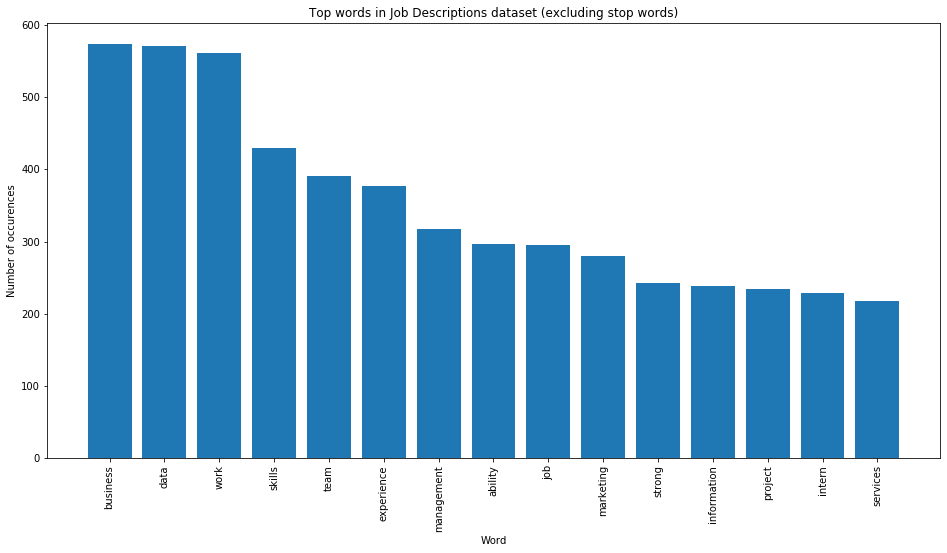

In [28]:
tex = data['Job Description']
type(tex)

count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=tex)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in Job Descriptions dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [29]:
tagged_headlines = [TextBlob(tex[i]).pos_tags for i in range(tex.shape[0])]

In [30]:
tagged_headlines_df = pd.DataFrame({'tags':tagged_headlines})

word_counts = [] 
pos_counts = {}

for headline in tagged_headlines_df[u'tags']:
    word_counts.append(len(headline))
    for tag in headline:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per headline: ', np.mean(word_counts))

Total number of words:  83362
Mean number of words per headline:  530.968152866242


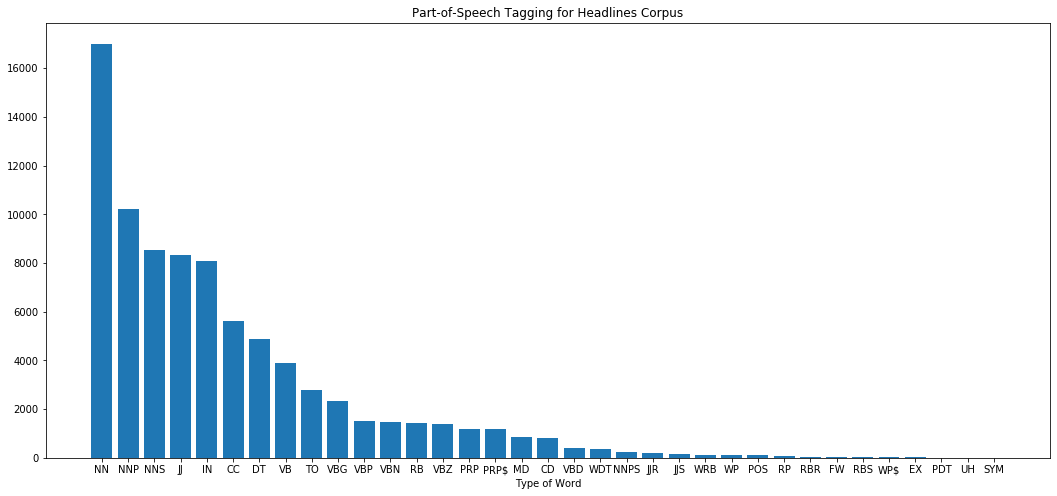

In [31]:
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(18,8))
ax.bar(range(len(pos_counts)), pos_sorted_counts);
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(pos_sorted_types);
ax.set_title('Part-of-Speech Tagging for Headlines Corpus');
ax.set_xlabel('Type of Word');

In [32]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=4000)
small_text_sample = tex.sample(n=100, random_state=0).values

print('Headline before vectorization: {}'.format(small_text_sample[12]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Headline after vectorization: \n{}'.format(small_document_term_matrix[12]))

Headline before vectorization:  Lead Management Intern  In this role on AlixPartners' Corporate Services Strategic/Lead Management team, the main responsibilities of the Lead Management Intern position will be responding to data requests and assisting other Lead Management staff in performing tasks on an as needed basis. The individual must be hard working, intelligent and have strong analytical skills.  The Lead Management Intern is a temporary role with a preferred location in our Dallas, Texas office, reporting to the Co-Director of Lead Management. Paid relocation is not available for this position.  Key Responsibilities:  * Research & analysis to support business development  * Respond to research requests  * Assist other Lead Management staff conducting financial, situation and performance analysis  * Pipeline management & reporting  * Assist in managing the opportunities pipeline for TRS  * Perform other ad hoc analysis as needed  Requirements/ Qualifications:  * Undergraduate w

In [34]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [38]:

stemmer = SnowballStemmer('english')
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


In [36]:
import pandas as pd
data = pd.read_csv('data.csv', error_bad_lines=False);
data_text = data[['Job Description']]
data_text['index'] = data_text.index
documents = data_text

C:\Users\Hp\Anaconda3\anac3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [39]:
doc_sample = documents[documents['index'] == 43].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['', 'ORGANIZATIONAL', 'SUMMARY:', '', 'As', 'part', 'of', 'the', "nation's", 'central', 'bank,', 'the', 'Federal', 'Reserve', 'Bank', 'of', 'Dallas', 'is', 'committed', 'to', 'strengthening', 'the', 'economy', 'and', 'our', 'communities.', 'At', 'the', 'Fed,', 'you', 'have', 'the', 'opportunity', 'to', 'become', 'part', 'of', 'an', 'important', 'public', 'service', 'institution', 'whose', 'work', 'touches', 'lives', 'across', 'the', 'globe.', "It's", 'a', 'big', 'job', 'and', "that's", 'why', 'we', 'need', 'talented,', 'results-driven', 'professionals', 'who', 'care', 'about', 'making', 'a', 'difference.', '', 'POSITION', 'SUMMARY:', '', 'As', 'a', 'Treasury', 'Services', 'intern', 'in', 'the', 'Federal', 'Reserve', 'Bank', 'of', 'Dallas', 'Treasury', 'Services', 'Department,', 'you', 'will', 'regularly', 'apply', 'analytical,', 'problem', 'solving,', 'written', 'and', 'interpersonal', 'skills.', 'You', 'will', 'have', 'the', 'opportunity', 'to', 'expand', 'your', 

In [45]:
processed_docs = documents['Job Description'].map(preprocess)
processed_docs

0                                                         [locat, plano, oklahoma, citi, durat, internship, summer, term, summari, visual, solut, seek, graduat, intern, strong, expertis, passion, data, analyt, solut, hana, oracl, bod, data, visual, tool, join, colleg, recruit, hire, program, role, build, best, class, analyt, data, solut, consum, leader, execut, fortun, organ, strong, sens, busi, analysi, data, model, data, warehous, visual, report, advanc, analyt, data, interpret, attribut, look, market, leader, analyt, visual, select, student, hire, candid, portfolio, academ, project, work, technic, blog, prefer, work, experi, academ, score, ask, hone, analyt, expertis, internship, work, best, custom, talent, world, requir, year, data, develop, relev, work, datawareh, experi, prefer, visual, consid, academ, ...]
1                       [digit, market, manag, line, patient, consum, audienc, engag, eyecar, servic, partner, affili, lead, defin, digit, market, emphasi, social, media, emai

In [46]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break


0 academ
1 access
2 advanc
3 analysi
4 analyt
5 area
6 ask
7 attribut
8 best
9 blog
10 bod


In [48]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[43]

[(4, 2),
 (6, 1),
 (9, 1),
 (13, 2),
 (18, 1),
 (24, 1),
 (32, 1),
 (34, 2),
 (35, 1),
 (38, 2),
 (40, 1),
 (44, 2),
 (50, 2),
 (51, 1),
 (53, 1),
 (58, 2),
 (66, 1),
 (69, 1),
 (86, 3),
 (89, 1),
 (94, 2),
 (98, 1),
 (102, 1),
 (109, 1),
 (112, 1),
 (116, 3),
 (118, 1),
 (121, 1),
 (132, 2),
 (134, 1),
 (136, 1),
 (137, 1),
 (142, 1),
 (147, 2),
 (148, 1),
 (149, 1),
 (154, 2),
 (158, 1),
 (159, 2),
 (167, 1),
 (169, 2),
 (172, 1),
 (182, 1),
 (185, 1),
 (189, 1),
 (195, 1),
 (196, 1),
 (197, 1),
 (198, 1),
 (199, 1),
 (200, 1),
 (201, 1),
 (202, 1),
 (203, 1),
 (204, 1),
 (205, 1),
 (206, 1),
 (207, 1),
 (208, 2),
 (209, 2),
 (210, 1),
 (211, 1),
 (212, 1),
 (213, 1),
 (214, 1),
 (215, 3),
 (216, 1),
 (217, 1),
 (218, 1),
 (219, 1),
 (220, 1),
 (221, 2),
 (222, 1),
 (223, 1),
 (224, 1),
 (225, 1),
 (226, 1),
 (227, 1),
 (228, 1),
 (229, 1),
 (230, 1),
 (231, 1),
 (232, 1),
 (233, 1),
 (234, 1),
 (235, 1),
 (236, 1),
 (237, 1),
 (238, 1),
 (239, 1),
 (240, 1),
 (241, 1),
 (420, 1)]

In [49]:

bow_doc_4310 = bow_corpus[43]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 4 ("area") appears 2 time.
Word 6 ("candid") appears 1 time.
Word 9 ("colleg") appears 1 time.
Word 13 ("execut") appears 2 time.
Word 18 ("interpret") appears 1 time.
Word 24 ("market") appears 1 time.
Word 32 ("report") appears 1 time.
Word 34 ("secur") appears 2 time.
Word 35 ("seek") appears 1 time.
Word 38 ("summari") appears 2 time.
Word 40 ("talent") appears 1 time.
Word 44 ("train") appears 2 time.
Word 50 ("analyz") appears 2 time.
Word 51 ("assist") appears 1 time.
Word 53 ("bachelor") appears 1 time.
Word 58 ("clear") appears 2 time.
Word 66 ("creativ") appears 1 time.
Word 69 ("design") appears 1 time.
Word 86 ("maintain") appears 3 time.
Word 89 ("organiz") appears 1 time.
Word 94 ("practic") appears 2 time.
Word 98 ("result") appears 1 time.
Word 102 ("softwar") appears 1 time.
Word 109 ("util") appears 1 time.
Word 112 ("adapt") appears 1 time.
Word 116 ("assign") appears 3 time.
Word 118 ("autom") appears 1 time.
Word 121 ("condit") appears 1 time.
Word 132 ("direc

In [50]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [51]:
corpus_tfidf = tfidf[bow_corpus]

In [52]:

from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.28035186292976627),
 (1, 0.051532168102587234),
 (2, 0.08250982395807999),
 (3, 0.03825672313320104),
 (4, 0.03557920600981078),
 (5, 0.11844787700722836),
 (6, 0.10669765669556934),
 (7, 0.11943176372891094),
 (8, 0.09995236427055951),
 (9, 0.056201599180263406),
 (10, 0.10231842249242366),
 (11, 0.10740877525261776),
 (12, 0.03623548711129738),
 (13, 0.04255740318312548),
 (14, 0.16501964791615997),
 (15, 0.07781161716270338),
 (16, 0.19105374338505995),
 (17, 0.10306433620517447),
 (18, 0.11943176372891094),
 (19, 0.05523278741812207),
 (20, 0.04108306576052356),
 (21, 0.0912816738076536),
 (22, 0.06134345683567288),
 (23, 0.0542820853516247),
 (24, 0.0389487212864917),
 (25, 0.0646981502909816),
 (26, 0.08953629933120262),
 (27, 0.10740877525261776),
 (28, 0.09995236427055951),
 (29, 0.08662182888338284),
 (30, 0.07351093711277894),
 (31, 0.06954572894020777),
 (32, 0.07514802765311643),
 (33, 0.08815151424105794),
 (34, 0.07351093711277894),
 (35, 0.07083341998938868),
 (36

In [53]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.030*"market" + 0.018*"digit" + 0.010*"career" + 0.010*"offer" + 0.010*"analysi" + 0.009*"financi" + 0.009*"media" + 0.009*"appli" + 0.008*"corpor" + 0.008*"client"
Topic: 1 
Words: 0.011*"assist" + 0.010*"client" + 0.010*"financi" + 0.010*"audit" + 0.010*"improv" + 0.009*"train" + 0.008*"account" + 0.008*"recruit" + 0.007*"plan" + 0.007*"analysi"
Topic: 2 
Words: 0.013*"candid" + 0.012*"problem" + 0.012*"design" + 0.010*"technic" + 0.010*"activ" + 0.010*"network" + 0.009*"microsoft" + 0.008*"disabl" + 0.008*"engin" + 0.008*"solv"
Topic: 3 
Words: 0.015*"client" + 0.013*"market" + 0.010*"design" + 0.010*"innov" + 0.008*"career" + 0.008*"custom" + 0.007*"technic" + 0.007*"creat" + 0.007*"impact" + 0.007*"event"
Topic: 4 
Words: 0.010*"market" + 0.010*"prepar" + 0.009*"state" + 0.009*"client" + 0.008*"leadership" + 0.008*"equip" + 0.008*"custom" + 0.007*"locat" + 0.007*"plan" + 0.007*"commit"
Topic: 5 
Words: 0.015*"duti" + 0.012*"employe" + 0.010*"essenti" + 0.008*"cli

In [54]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [55]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.020*"model" + 0.012*"visual" + 0.006*"group" + 0.005*"healthcar" + 0.005*"select" + 0.005*"stakehold" + 0.005*"segment" + 0.005*"optim" + 0.005*"academ" + 0.005*"engin"
Topic: 1 Word: 0.009*"capabl" + 0.009*"client" + 0.008*"estat" + 0.008*"procedur" + 0.007*"particip" + 0.007*"pace" + 0.007*"empow" + 0.007*"economi" + 0.007*"campus" + 0.006*"serv"
Topic: 2 Word: 0.010*"healthcar" + 0.008*"clear" + 0.007*"feder" + 0.007*"monitor" + 0.006*"condit" + 0.006*"maintain" + 0.006*"hour" + 0.006*"stakehold" + 0.005*"secur" + 0.005*"inventori"
Topic: 3 Word: 0.019*"digit" + 0.014*"content" + 0.014*"market" + 0.012*"media" + 0.010*"campaign" + 0.008*"email" + 0.008*"brand" + 0.007*"group" + 0.006*"cultur" + 0.006*"social"
Topic: 4 Word: 0.008*"market" + 0.007*"risk" + 0.007*"recruit" + 0.006*"firm" + 0.006*"public" + 0.006*"hour" + 0.005*"relationship" + 0.005*"scientist" + 0.005*"estat" + 0.005*"human"
Topic: 5 Word: 0.011*"month" + 0.007*"senior" + 0.007*"model" + 0.007*"finan

In [56]:
for index, score in sorted(lda_model[bow_corpus[43]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9922395348548889	 
Topic: 0.011*"assist" + 0.010*"client" + 0.010*"financi" + 0.010*"audit" + 0.010*"improv" + 0.009*"train" + 0.008*"account" + 0.008*"recruit" + 0.007*"plan" + 0.007*"analysi"


In [57]:
for index, score in sorted(lda_model_tfidf[bow_corpus[43]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.6552976965904236	 
Topic: 0.010*"healthcar" + 0.008*"clear" + 0.007*"feder" + 0.007*"monitor" + 0.006*"condit" + 0.006*"maintain" + 0.006*"hour" + 0.006*"stakehold" + 0.005*"secur" + 0.005*"inventori"

Score: 0.33780398964881897	 
Topic: 0.006*"texa" + 0.005*"engin" + 0.005*"world" + 0.005*"report" + 0.005*"client" + 0.005*"test" + 0.005*"career" + 0.005*"worldwid" + 0.005*"interact" + 0.005*"consult"


In [61]:
unseen_document = 'Expert in modelling and machine learning'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.6999040246009827	 Topic: 0.015*"model" + 0.011*"client" + 0.010*"report" + 0.009*"global" + 0.009*"real"
Score: 0.03335385397076607	 Topic: 0.015*"duti" + 0.012*"employe" + 0.010*"essenti" + 0.008*"client" + 0.008*"healthcar"
Score: 0.033353667706251144	 Topic: 0.030*"market" + 0.018*"digit" + 0.010*"career" + 0.010*"offer" + 0.010*"analysi"
Score: 0.03334713727235794	 Topic: 0.018*"report" + 0.010*"sale" + 0.010*"direct" + 0.009*"activ" + 0.009*"particip"
Score: 0.0333457849919796	 Topic: 0.022*"consult" + 0.021*"client" + 0.014*"senior" + 0.014*"market" + 0.013*"summer"
Score: 0.03334294259548187	 Topic: 0.011*"assist" + 0.010*"client" + 0.010*"financi" + 0.010*"audit" + 0.010*"improv"
Score: 0.0333387516438961	 Topic: 0.013*"candid" + 0.012*"problem" + 0.012*"design" + 0.010*"technic" + 0.010*"activ"
Score: 0.03333861753344536	 Topic: 0.037*"client" + 0.030*"market" + 0.011*"technic" + 0.010*"consult" + 0.009*"sale"
Score: 0.03333783522248268	 Topic: 0.015*"client" + 0.013*

In [62]:
design_development="POSITION SUMMARY:  This position is responsible for supporting the architectural needs of the Franchise Department and the Design & Construction Department.   ESSENTIAL JOB FUNCTIONS:   Provide conceptual site plans for potential franchise new construction and conversion projects. Provide exterior renderings for architectural enhancements on potential conversion properties using Photoshop and Sketch-Up. Review architectural plan specifications and design submittals for franchise new construction and conversions. Maintain and update prototype plans and FF&E standard manuals. Provide support to Franchisees and their outside consultants by communicating clearly and concisely as it pertains to the D&C Design Guidelines and Brand Standards. Conduct and review the Conversion and/or Transfer PIP with internal staff prior to submitting the final PIP to the Franchise Sales team. Conduct and review the Refresh PIP with internal staff prior to submitting the final PIP to the Franchise Operations team. Develop various design solutions that addresses LQâ€™s required design/operational programs. Maintain the Design & Construction Product Library. Perform site visits to hotels under construction for inspections of construction materials, device and fixture locations and general compliance with documents and prototype standards. EDUCATION/EXPERIENCE:   MINIMUM EDUCATION:  Bachelorâ€™s Degree required in Architecture.  MINIMUM EXPERIENCE:   3 years to 5 years in commercial architecture. Commercial site planning and conceptual design experience is required.  MINIMUM SKILL REQUIREMENTS:  Capable of using digital photography equipment and photo modification software. Proficient in AutoCAD. Proficient in computer programs such as Sketch-up, Revit, Excel and Microsoft Projects. Has managerial skills needed to direct temporary workers or interns. Decisions and impact are limited to decisions and planning within a small workgroup/project team. Work is analytical, non-standard and widely varied requiring the interpretation and application of a variety of policies and procedures. Analytic ability and inductive thinking are required for the application of multiple, technical activities. Problem solving involves identification and analysis of diverse issues. Makes analytical decisions; supervision is present to establish and review broad objectives relative to basic position duties or divisional responsibilities. Independent judgment is required to study previously established, often partially relevant guidelines; plan for various interrelated activities; and coordinate such activities within a work unit /division or while completing a project. Responds to or handles unfamiliar situations. Has entry-level knowledge of theories and practices of a professional field (e.g., fiscal, quality assurance, infection control, etc.). This level of skill is typically reserved for an individual with a four-year degree, or a high-level vocational skill demonstrated by a number of years of on-the-position experience (i.e., management). Writes reports using technical data requiring considerable interpretation, developing new methods and procedures. Frequently applies knowledge to practical issues and problems. Solves problems that involve identification and analysis of diverse problems; answers are usually found by reviewing standard technical manuals and administrative procedures and modifying them for unusual situations. Guidance is usually provided on what sources to review and solutions are reviewed before acceptance. Completes work that requires using original and creative thinking to develop new, moderately complex results. The results generally impact several work groups, a large project or an extended customer base. Applies established technology solutions and makes recommendations for use of technology to improve individual or small work group efficiency and effectiveness. Serves as a lead project team member checking the work of others. An employee in this position may be responsible for training of new team members. Work is typical in nature with occasional situations requiring new solutions. Requires regular contacts to carry out programs and to explain non-specialized matter or occasional contacts with officials at higher levels on matters requiring cooperation, explanation and persuasion. Requires regular external contacts to carry out organization programs and to explain non-specialized matters. Position requires contacts with customers or the public which usually involve regular sales, service, or business relationships but where the primary responsibility for resolving difficulties lies with someone else.  PHYSICAL, MENTAL AND ENVIRONMENTAL DEMANDS:   Working conditions of the position are a normal office situation  May work alone or closely with others. Work is completed sitting at a desk or table with intermittently standing and stooping. May be required to do light lifting or carrying. Capable of working in a fast paced environment and in stressful situations. Must respond to multiple task interruptions and still provide service to internal and external customers in a professional and courteous manner. Requires overnight travel 50> of the time. May be required to walk, sit and/or stand for long periods of time. Requires good hearing. Requires good near and distant vision. Requires distinguishing colors and/or depth perception.  LQ Management L.L.C. provides equal employment opportunities to applicants and employees without regard to race, color, religion, gender, sexual orientation, gender identity, national origin, protected veteran status, or disability."
senior_corporate_recruiter=" Partner with Information Technology business leaders on workforce requirements, staffing forecasts, position requirements, candidate availability and job descriptions for technical/analytical and management positions. Gain a thorough understanding of job descriptions and requirements in order to source accurate candidates. Leverage online recruiting resources and in-house applicant tracking system (ATS) to identify and recruit the very best talent. Utilize an existing network within the Information Technology space and the drive to reach beyond traditional recruiting methods to find leaders and influencers within their respective disciplines.  Full-cycle recruiting to include review, screen, interview, and recommendation top talent for a wide-variety of positions across application development, infrastructure, help desk, data warehousing, telecommunications, networking, security, quality assurance, etc. Review online applications, evaluate candidate qualifications, and conduct pre-screen interviews to analyze candidate experience, availability, interest level, and salary requirements. May assist in college and intern recruitment strategy to support the growing business. Must be highly organized to be able to manage and track applicants, and provide weekly recruitment status. Manage all offer letter and pre-hire screening for selected candidates. Follow and champion all OFCCP compliance requirements. Bachelors degree or equivalent education, training and work-related experience 4-6+ years of experience in full-life cycle technical recruitment in a dynamic environment recruiting engineers, IT and project support candidates. Experience supporting multiple business units in non-exempt and exempt-level recruiting. Experience with multiple recruiting software platforms such as: Taleo, MyStaffingPro, CareerBuilder, LinkedIn, Indeed, ICIMS, Workday. Strong verbal, written and presentation skills with strong attention to detail. Skilled in establishing productive and effective working relationships. Ability to learn new technology and adapt to a new environment. Strong analytical, administration and problem solving skills. Ability to exercise good judgment in protection and dissemination of company confidential and proprietary information. Demonstrate initiative and manages own performance effectively. Must have experience with MS Office Suite (Outlook, Word, Excel, PowerPoint, Project, and/or Access). Expert knowledge of employment law and corporate recruitment practices. In-depth experience in competency-based interview and assessment techniques. Financial services recruiting experience highly desired. Experience in a government contracting environment is preferred."
data_science="University Programs: Engineering Intern Raytheon Intelligence, Information and Services (IIS) seeks qualified intern to support key analytics efforts. Key responsibilities include support to data scientists, who are creating data-driven analytics techniques across the full lifecycle of IISs business.Job Description : The selected candidate will perform the following dutiesÂ· General support to data scientists in the development of algorithms to derive insight from large volumes of dataÂ· Contribute to core research by through data collection, analysis and cleansingÂ· Support the analysis of analytics algorithms by helping develop test data, test procedures, and in executing tests on analytic functionsÂ· Work under the direction of a Data Scientist or Principal Investigator, as part of a small team of engineers on IRAD and similar advanced development projectsRequired Skills & Experience :Â· Education in Computer Science, Mathematics, and Statistics Â· Excellent written and verbal communication skillsÂ· Ability to work in a fast-paced multidisciplinary and collaborative environment This position requires the ability to access systems that contain information restricted to US Citizens based on certain Federal Government contractual requirements.Desired Skills & Experience :Â· Experience in technologies for informatics, data mining, and/or analyticsÂ· Experience in AI-related areas (machine learning, natural language processing, dynamic or autonomous systems, etc.)Â· Exposure to modeling/simulation techniquesÂ· Ability to write and perform database queries and perform technical statistical analysis using a range of technologies (SQL, Python, R, Ruby, Matlab) Â· Expertise in commercial best-practice big data technologies (Hadoop, Hive, Map Reduce)Â· Ability to present analytic results to senior management in clear language about the implications of the results to the organization Required Education:Must have obtained sophomore, junior or senior status by Summer of 2017Must be pursuing a Bachelors degree in Computer Science, Mathematics, Statistics, Data Science or related field Please include your transcript with your resume. This position can be for a Sophmore, Junior, or Senior Internship based on the candidates qualifications as they relate to the skills, experience and responsibility requirements for the position.Â·Freshman status must have completed 30 hours of college credits towards degree and obtained Sophomore status as of Summer 2017.Â·Sophmore status must have completed 60 hours of college credits towards degree and obtained Sophomore status as of Summer 2017.Â·Junior status must have completed 90 hours of college credits towards degree and obtained Junior status as of Summer 2017.Â·Senior status must have completed 120hours of college credits towards degree and obtainedSenior status as of Summer 2017.This position requires the ability to access systems that contain information restricted to US Citizens based on certain Federal Government contractual requirements 92612"
ee_internship= "Overview:    PURPOSEWe have the assets necessary to meet the building and design challenges of todayâ€™s increasing urbanization. With the most innovative cement, concrete, and aggregates solutions, strong R&D and a commitment to health, safety, and sustainability, the Company has the building solutions to meet customersâ€™ needs, from the individual homebuilder to the largest and most complex project. We are committed to drive sustainable solutions for better building and infrastructure while contributing to a higher quality of life.  In the United States, headquartered in Chicago, Illinois, LafargeHolcim companies have sites located in 43 states and employ approximately 6,000 people. Our customers rely on us to help them design and build better communities with innovative solutions that deliver structural integrity and eco-efficiency. We are committed to contributing to Building Better Cities and are an active participant in local environmental, educational and sustainable construction initiatives, including relationships with the Wildlife Habitat Council and Habitat for Humanity. This internship will be located at one of our sites throughout the United States.     Responsibilities:    INTERN RESPONSIBILITIESGain knowledge about the operating procedures and process control plans and various products at a Cement or Aggregate siteDemonstrates a commitment to communicating, improving and adhering to safety policies in all work environments and areas.Understand various operationsMaintain, organize, prepare, review and revise drawings as required.Prepare engineering scope of work for plant electrical projects.Prepare cost estimates and justifications for the capital plan.Research/recommend new PM procedures based on newly developed technologies.Collate data, establish process correlations and develop strategies for capital projectsIncumbent will get firsthand knowledge on how to ensure maximum process equipment capacity usagethrough continuous monitoring and improvement of process control parametersIncumbent will be assigned to a real job/task and expected to make a contribution that will have an impact on the businessIncumbent will be expected to utilize various skill sets/knowledgeIncumbent will be expected to make a presentation at the end of their internship to executive leadership regarding what they have learned and what they believe they have contributed to the business, as wellPOTENTIAL ELECTIRCAL ENGINEERING PROJECTSParticipate in the creation of preventative maintenance routines (PMRs) and bills of materials (BOMs) for electrical equipment.Interface with contractors utilized in project work, including solicitation of quotes, selection and field direction.Conduct economic and operation feasibility studies on proposed electrical modifications and additions.Maintain a standard set of specifications for consistent application related to modifications or additions.Develop detailed preventative maintenance routines for all plant electrical equipment.Use SAP to purchase parts and services, review work orders, analyse reports and manage capital projects related to electrical project management and PM development.Other duties as assigned.RELATIONSHIPS WITH OTHER JOBSWorks closely with the equipment suppliers, plant staff and Process Area Teams to ensure the successful operation of the plant.      Qualifications:    KNOWLEDGE, SKILLS & ABILITIESRequired Education: Must be currently enrolled in an undergraduate program majoring in engineering Required Field of Study: Electrical EngineeringAdditional Requirements: GPA of 3.0 or higher1 previous internship in electrical engineering required, preferably at an industrial companyStrong analytical, problem solving and organizational skillsMust be team oriented and able to work with all levels of the organizationMust be willing to spend time out in field getting know the business Ability to work flexible hours, at times, throughout the summerPhysical Requirements / Working Conditions:Frequent sitting, standing, and walkingSome exposure to dust, noise, and extreme temperatures* ( *not for all majors) Required Computer and Software Skills: Microsoft Office (Word, Excel, PowerPoint etc.). Interns will utilize SAP, Autocad, Project throughout the duration of the internship.   Lafarge North America Inc., Holcim (US) Inc., and Aggregate Industries Management, Inc., and their affiliates, are Equal Opportunity Employers. All qualified applicants will receive consideration for employment without regard to race, color, religion, sex, age, national origin, sexual orientation, gender identity, protected veteran status or status as an individual with a disability. We embrace diversity in our people, products and ideas. While we sincerely appreciate all applications, only candidates selected for an interview will be contacted.     America's Job Exchange Source Codes :    AJETR+00, AJETR+01, AJETR+02 ,AJETR+03, AJETR+04, AJETR+05, AJETR+06, AJETR+07, AJETR+08     State Specific Source Code:    AJETR+MO1 "


In [71]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
english_stops = open("english_stopwords.txt", "r").read()

# Tokenize the article: tokens
tokens = word_tokenize(design_development)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
# isalpha() only True when we have alphabetical characters
tokens=[w for w in word_tokenize(design_development.lower()) if w.isalpha()]
no_stops=[t for t in tokens if t not in stopwords.words('english')]
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized1 = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow_travel = Counter(lemmatized1)

from gensim.corpora.dictionary import Dictionary

In [72]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
english_stops = open("english_stopwords.txt", "r").read()

# Tokenize the article: tokens
tokens = word_tokenize(senior_corporate_recruiter)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
# isalpha() only True when we have alphabetical characters
tokens=[w for w in word_tokenize(design_development.lower()) if w.isalpha()]
no_stops=[t for t in tokens if t not in stopwords.words('english')]
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized2 = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow_travel = Counter(lemmatized2)

from gensim.corpora.dictionary import Dictionary

In [76]:
documents=[lemmatized1,lemmatized2]
dictionary=Dictionary(documents)
dictionary.token2id
corpus=[dictionary.doc2bow(doc) for doc in documents]

In [85]:
import itertools as it
# Save the fifth document: doc
doc = corpus[1]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)
    
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in it.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

experience 9
recruiting 7
candidate 6
requirement 5
recruitment 4


In [86]:
import itertools as it
# Save the fifth document: doc
doc = corpus[0]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)
    
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in it.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

work 9
requires 8
required 7
construction 6
design 6
